In [1]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

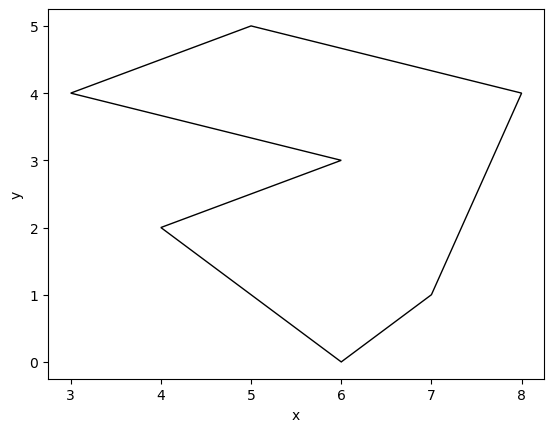

In [7]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [13]:
%matplotlib tk

polygon = []

events = []
active = True
tmp_line = None

def draw_point(point):
    """
    Umieszcza punkt o danych współrzędnych na płaszczyźnie.
    :param point: krotka (x, y) określająca położenie punktu
    """
    plt.scatter(point[0], point[1], color="red")
    plt.show()

def draw_line(points, style='solid', color='red', linewidth=1.0, alpha=1.0):
    """
    Tworzy linię łączącą dwa punkty na płaszczyźnie.
    :param points: lista krotek reprezentujących punkty, pomiędzy którymi dodajemy krawędź
    """
    ax = plt.gca()
    x = [points[0][0], points[1][0]]
    y = [points[0][1], points[1][1]]
    line, = ax.plot(x, y, linestyle = style, color = color, linewidth = linewidth, alpha = alpha)
    ax.figure.canvas.draw()
    return line

def onclick(event):
    """
    Obsługuje interakcję z myszą:
    - podwójne kliknięcie lewym przyciskiem dodaje nowy punkt
    - podwójne kliknięcie prawym przyciskiem kończy tworzenie wielokąta
    :param event: obiekt zawierający dane o zdarzeniu myszy
    """
    global active, tmp_line
    if event.dblclick and active:
        if event.button == 1:
            x = event.xdata
            y = event.ydata
            polygon.append((x, y))
            events.append(event)
            draw_point((x, y))
            if len(polygon) > 1:
                draw_line([polygon[-2], polygon[-1]])
            if len(polygon) >= 3:
                if tmp_line is not None:
                    tmp_line.remove()
                tmp_line = draw_line([polygon[-1], polygon[0]],style = 'dashed', color = 'gray', linewidth = 1.0, alpha = 0.5)
        elif event.button == 3 and len(polygon) > 2:
            if tmp_line is not None:
                tmp_line.remove()
                tmp_line = None
            draw_line([polygon[-1], polygon[0]])
            active = False
            plt.pause(0.5)
            ax.set_title("Wielokąt został utworzony. Zamykanie okna...")
            plt.pause(2)
            plt.close()

fig, ax = plt.subplots()
plt.get_current_fig_manager().set_window_title("Kreator wielokąta")
ax.set_title("Podwójne kliknięcie LPM: dodaj punkt\nPodwójne kliknięcie PPM: zakończ")
connection_id = fig.canvas.mpl_connect("button_press_event", onclick)
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
# ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.ion()
plt.show()

In [12]:
%matplotlib inline

if len(polygon) < 2: print("Liczba punktów mniejsza niż 3")
else:
    draw_polygon(polygon)
    print(polygon)

NameError: name 'polygon' is not defined

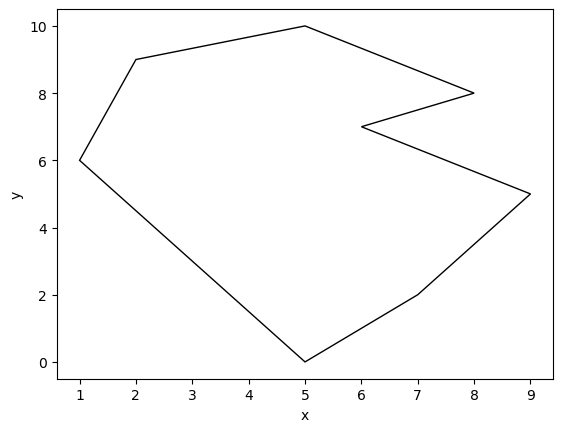

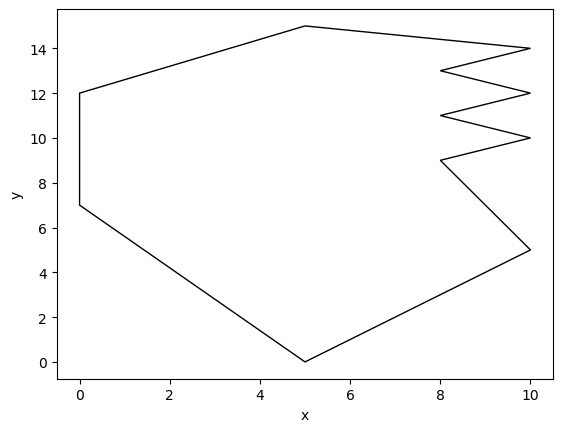

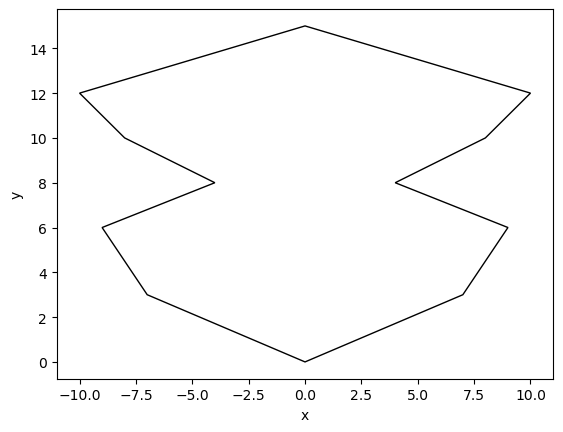

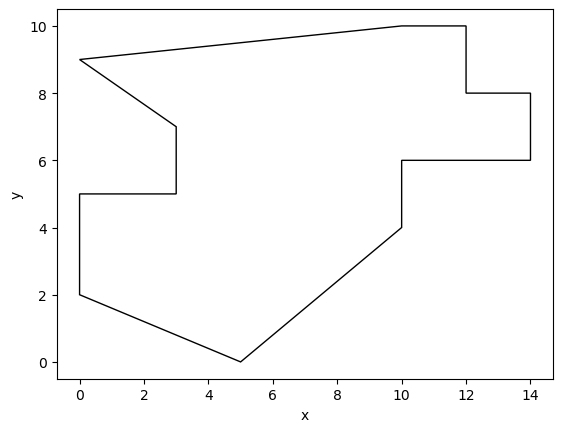

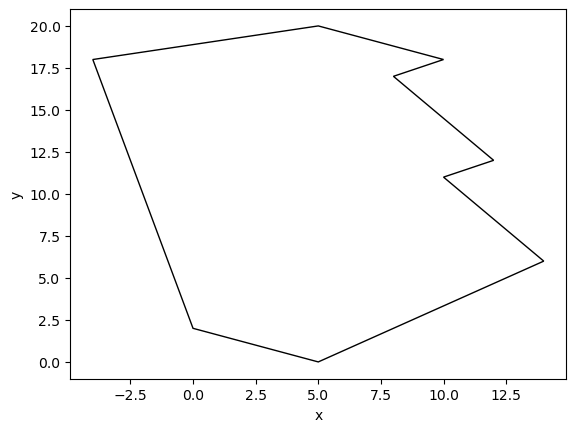

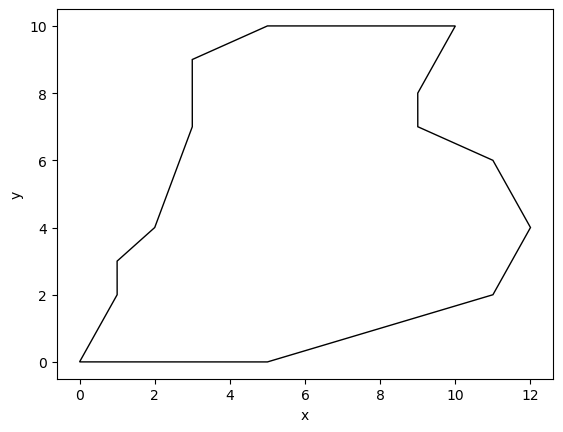

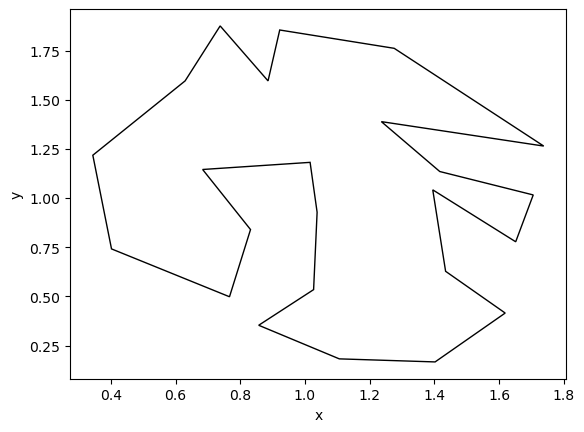

In [24]:
A = [
    (5.0, 10.0), 
    (8.0, 8.0), 
    (6.0, 7.0), 
    (9.0, 5.0), 
    (7.0, 2.0), 
    (5.0, 0.0), 
    (3.0, 3.0), 
    (1.0, 6.0), 
    (2.0, 9.0)
]

B = [
    (5.0, 15.0), 
    (10.0, 14.0), 
    (8.0, 13.0), 
    (10.0, 12.0), 
    (8.0, 11.0), 
    (10.0, 10.0), 
    (8.0, 9.0), 
    (10.0, 5.0), 
    (5.0, 0.0), 
    (0.0, 7.0), 
    (0.0, 12.0)
]

C = [
    (0.0, 15.0), 
    (10.0, 12.0), 
    (8.0, 10.0), 
    (4.0, 8.0), 
    (9.0, 6.0), 
    (7.0, 3.0), 
    (0.0, 0.0), 
    (-7.0, 3.0), 
    (-9.0, 6.0), 
    (-4.0, 8.0), 
    (-8.0, 10.0), 
    (-10.0, 12.0)
]

D = [
    (10.0, 10.0), 
    (12.0, 10.0), 
    (12.0, 8.0), 
    (14.0, 8.0), 
    (14.0, 6.0), 
    (10.0, 6.0), 
    (10.0, 4.0), 
    (5.0, 0.0), 
    (0.0, 2.0), 
    (0.0, 5.0), 
    (3.0, 5.0), 
    (3.0, 7.0), 
    (0.0, 9.0)
]

E = [
    (5.0, 20.0), 
    (10.0, 18.0), 
    (8.0, 17.0), 
    (12.0, 12.0), 
    (10.0, 11.0), 
    (14.0, 6.0), 
    (5.0, 0.0), 
    (0.0, 2.0), 
    (-1.0, 6.0), 
    (-2.0, 10.0), 
    (-3.0, 14.0), 
    (-4.0, 18.0)
]

F = [
    (5.0, 10.0), 
    (10.0, 9.999), 
    (9.0, 8.0), 
    (9.001, 7.0), 
    (11.0, 6.0), 
    (12.0, 4.0), 
    (11.001, 2.0), 
    (5.0, 0.0), 
    (0.0, 0.001), 
    (1.0, 2.0), 
    (0.999, 3.0), 
    (2.0, 4.0), 
    (3.0, 7.0), 
    (2.999, 9.0)
]

polygon = [(np.float64(0.6294141252006419), np.float64(1.5958701216531015)), (np.float64(0.3441011235955055), np.float64(1.2179689971527998)), (np.float64(0.4018860353130015), np.float64(0.7417100457277616)), (np.float64(0.7666532905296949), np.float64(0.4984038422823617)), (np.float64(0.8316613162118778), np.float64(0.8400678726524976)), (np.float64(0.6835874799357944), np.float64(1.145494808892468)), (np.float64(1.0158507223113964), np.float64(1.1817319030226336)), (np.float64(1.0375200642054572), np.float64(0.928072244111472)), (np.float64(1.0266853932584268), np.float64(0.5346409364125276)), (np.float64(0.8569422150882824), np.float64(0.35345546576169784)), (np.float64(1.1061396468699838), np.float64(0.18262345057662988)), (np.float64(1.4022873194221506), np.float64(0.16709326737798735)), (np.float64(1.6189807383627606), np.float64(0.41557619855626804)), (np.float64(1.4347913322632422), np.float64(0.6278220356043829)), (np.float64(1.3950642054574636), np.float64(1.041960254234851)), (np.float64(1.651484751203852), np.float64(0.7779471398579275)), (np.float64(1.7056581059390046), np.float64(1.0160766155704466)), (np.float64(1.4167335473515246), np.float64(1.135141353426706)), (np.float64(1.2361556982343498), np.float64(1.3888010123378676)), (np.float64(1.738162118780096), np.float64(1.2645595467487274)), (np.float64(1.2758828250401282), np.float64(1.7615254091052885)), (np.float64(0.9219502407704654), np.float64(1.8547065082971441)), (np.float64(0.8858346709470304), np.float64(1.5958701216531015)), (np.float64(0.7377608346709469), np.float64(1.8754134192286673))]

polygons = [A, B, C, D, E, F, polygon]

for pol in polygons:
    draw_polygon(pol)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [7]:
def find_min_max(T):
    n = len(T)
    min_val = T[0][1]
    min_ind = 0
    max_val = T[0][1]
    max_ind = 0
    
    for i in range(1, n):
        val = T[i][1]
        if val < min_val:
            min_val = val
            min_ind = i
            
        if max_val < val:
            max_val = val
            max_ind = i
            
    return min_ind, max_ind

In [8]:


def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    min_ind, max_ind = find_min_max(polygon)
    
    i = min_ind
    while i != max_ind:
        j = (i + 1) % n
        if polygon[j][1] <= polygon [i][1]: return False
        i = j
        
    while i != min_ind:
        j = ( i+ 1) % n
        if polygon[i][1] <= polygon[j][1]: return False
        i = j
        
    return True

Przeprowadź test poprawności powyższej funkcji.

In [9]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

In [10]:
print(is_y_monotonic(polygons[0]))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

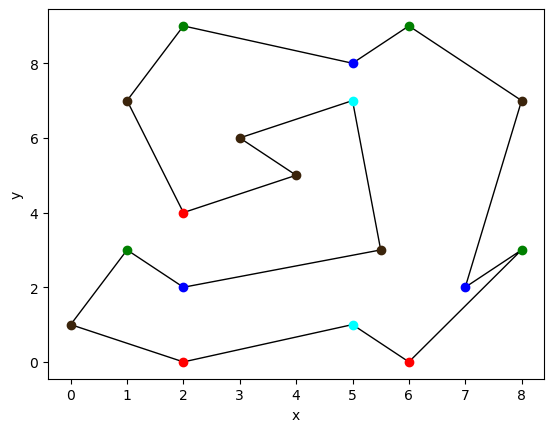

In [11]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [74]:
def orientation(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

In [48]:


def color_vertex(polygon, eps=1e-24):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    colors = [None for _ in range(n)]
    
    for i in range(n):
        prev = polygon[i-1]
        curr = polygon[i]
        next = polygon[(i+1)%n]
        orient = orientation(prev, curr, next)
        
        if prev[1] < curr[1] and next[1] < curr[1]:
            if orient > eps:
                colors[i] = 0
            elif orient < -eps:
                colors[i] = 3
            else: colors[i] = 4
            
        elif curr[1] < prev[1] and curr[1] < next[1]:
            if orient > eps:
                colors[i] = 1
            elif orient < -eps:
                colors[i] = 2
            else: colors[i] = 4
            
        else: colors[i] = 4
        
    return colors

Przeprowadź test poprawności powyższej funkcji. 

In [75]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

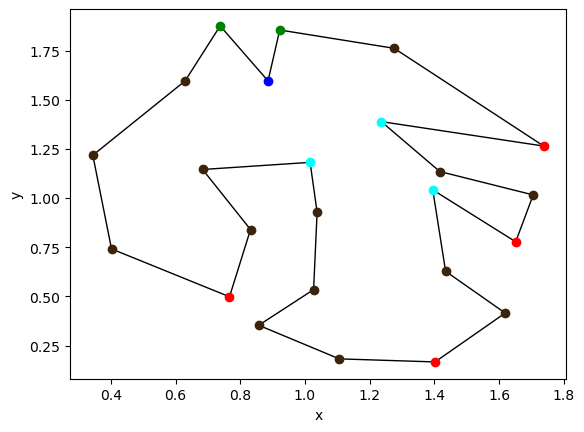

In [76]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

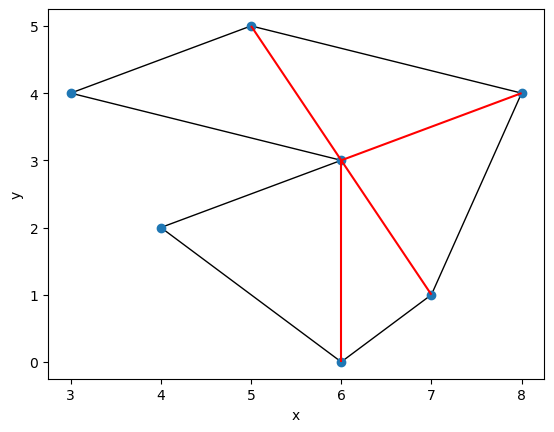

In [77]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [78]:
def group_chains(polygon):
    """
    Funckcja grupuje punkty w poligonie w dwa lancuchy, wierzcholek poczatkowy i koncowy jest zalicznay do lewego lancucha
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica boolean, na kazdym indesie jest informacja czy wierzcholek o takim indeksie w polygon znajduje sie w lewym lancuchu - True, czy w prawym - False
    """
    n = len(polygon)
    in_left_chain = [False for _ in range(n)]
    min_, max_ = find_min_max(polygon)
    
    ind = min_
    while ind != max_:
        in_left_chain[ind] = True
        ind = (ind + 1) % n
    in_left_chain[max_] = True    
    
    return in_left_chain

In [113]:
def are_neighbors(a, b, n):
    return abs(a[2] - b[2]) == 1 or abs(a[2] - b[2]) == n - 1

In [124]:
def triangulation(polygon, eps=1e-24):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n = len(polygon)
    new_polygon = [None for _ in range(n)]
    in_left_chain = group_chains(polygon)
    triangulation = []
    for i in range(n):
        new_polygon[i] = (polygon[i][0], polygon[i][1], i) #do krotki ze wspolzednymi punktu dodaje indeks w oryginalnej tablicy
    sorted_polygon = sorted(new_polygon, key=lambda p: (-p[1], p[0]))
    
    stack = []
    stack.append(sorted_polygon[0])
    stack.append(sorted_polygon[1])
    
    for i in range(2, n):
        point = sorted_polygon[i]
        top = stack[-1]
        if in_left_chain[point[2]] != in_left_chain[top[2]]: #punkty sa z roznych lancuchow
            for j in range(len(stack)):
                if not are_neighbors(stack[j], point, n): # punkty nie sasiaduja ze soba w grafie
                    triangulation.append((stack[j][2], point[2]))
                
            stack.clear()
            stack.append(top)
            stack.append(point)
            #stack.append(top)
            #stack.append(point)
            
        else: #punkty sa z jednego lancucha
            while len(stack) > 1 and \
                ((in_left_chain[point[2]] and orientation(stack[-2], stack[-1], point) < -eps) or \
                (not in_left_chain[point[2]] and orientation(stack[-2], stack[-1], point) > eps)): # trojkat tworzony przez 3 punkty nalezy do grafu
                if not are_neighbors(point, stack[-2], n): 
                    triangulation.append((point[2], stack[-2][2]))
                stack.pop()
            stack.append(point)
            
    for i in range(len(triangulation)):
        triangulation[i] = (min(triangulation[i]), max(triangulation[i]))
            
    return triangulation


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [125]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

Time: 0.000s


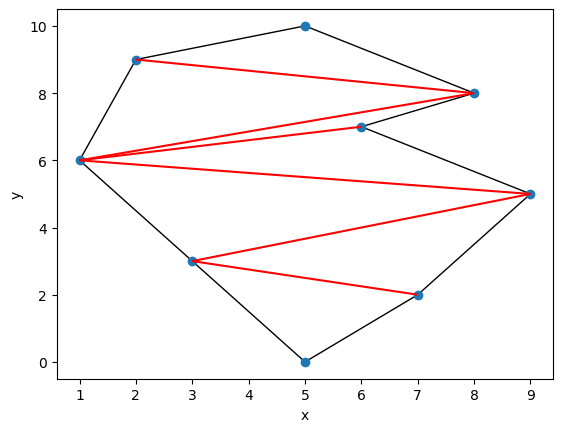

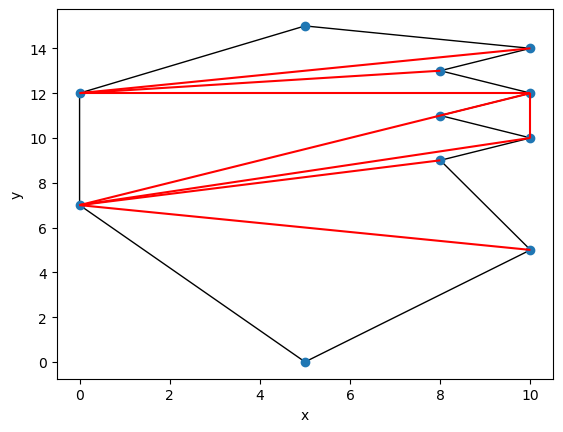

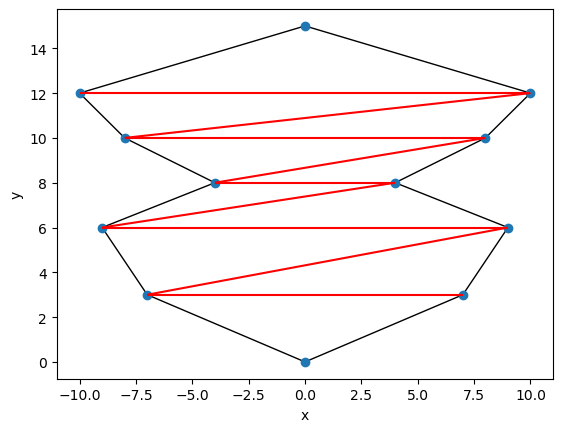

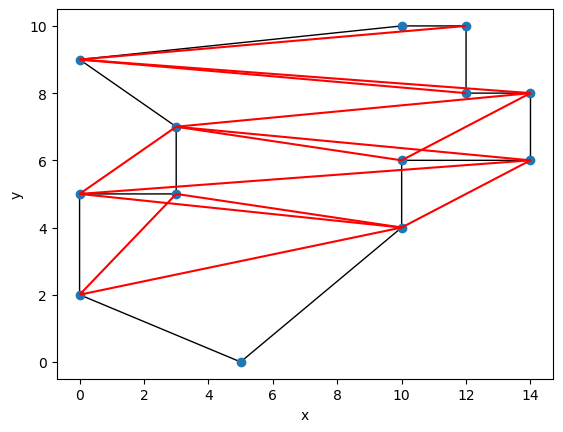

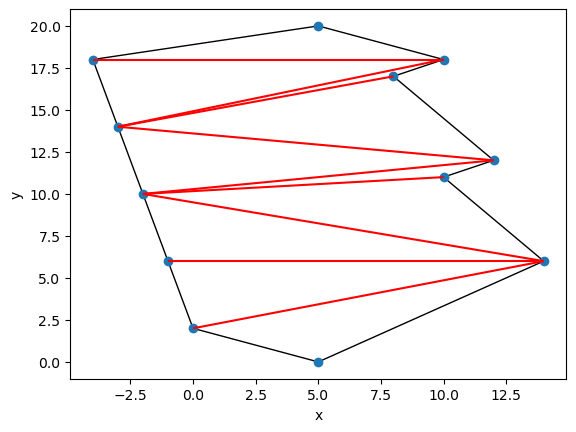

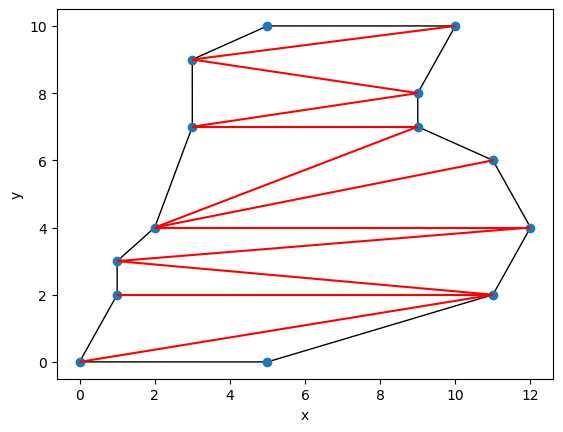

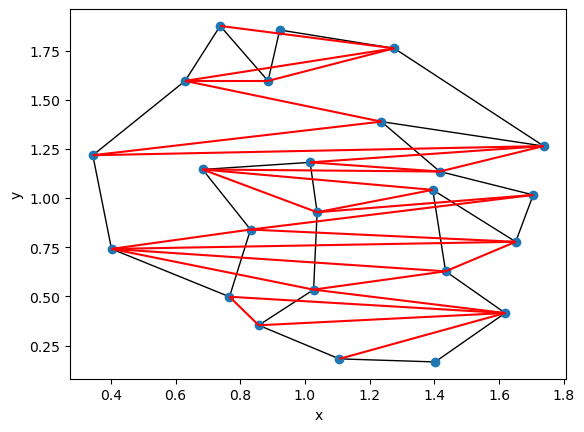

In [126]:
polygon = polygons[4]
tri = triangulation(polygon)

for polygon in polygons:
    tri = triangulation(polygon)
    draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [142]:
def triangulation_draw(polygon, eps=1e-24):
    
    vis = Visualizer()
    vis.add_point(polygon, color="blue")
    for i in range(1, len(polygon)):
        vis.add_line_segment([polygon[i], polygon[i-1]], color="blue")
    vis.add_line_segment([polygon[0], polygon[-1]], color="blue")
    
    n = len(polygon)
    new_polygon = [None for _ in range(n)]
    in_left_chain = group_chains(polygon)
    triangulation = []
    for i in range(n):
        new_polygon[i] = (polygon[i][0], polygon[i][1], i) #do krotki ze wspolzednymi punktu dodaje indeks w oryginalnej tablicy
    sorted_polygon = sorted(new_polygon, key=lambda p: (-p[1], p[0]))
    
    stack = []
    stack.append(sorted_polygon[0])
    stack.append(sorted_polygon[1])
    vis.add_point(polygon[stack[-1][2]], color="red")
    vis.add_point(polygon[stack[-2][2]], color="red")
    
    for i in range(2, n):
        point = sorted_polygon[i]
        top = stack[-1]
        vis.add_point(polygon[point[2]], color="red")
        if in_left_chain[point[2]] != in_left_chain[top[2]]: #punkty sa z roznych lancuchow
            for j in range(len(stack)):
                if not are_neighbors(stack[j], point, n): # punkty nie sasiaduja ze soba w grafie
                    triangulation.append((stack[j][2], point[2]))
                    vis.add_line_segment([polygon[stack[j][2]], polygon[point[2]]], color="red")
            
            while len(stack) > 0:
                vis.add_point(polygon[stack[-1][2]], color="pink")
                stack.pop()
            
            stack.append(top)
            stack.append(point)
            #vis.add_point(stack, color="red")
            #stack.append(top)
            #stack.append(point)
            
        else: #punkty sa z jednego lancucha
            while len(stack) > 1 and \
                ((in_left_chain[point[2]] and orientation(stack[-2], stack[-1], point) < -eps) or \
                (not in_left_chain[point[2]] and orientation(stack[-2], stack[-1], point) > eps)): # trojkat tworzony przez 3 punkty nalezy do grafu
                if not are_neighbors(point, stack[-2], n): 
                    triangulation.append((point[2], stack[-2][2]))
                    vis.add_line_segment([polygon[stack[-2][2]], polygon[point][2]], color="red")
                vis.add_point(polygon[stack[-1][2]], color="pink")
                stack.pop()
            stack.append(point)
            vis.add_point(polygon[point[2]], color="red")
            
    for i in range(len(triangulation)):
        triangulation[i] = (min(triangulation[i]), max(triangulation[i]))
            
    return triangulation, vis

In [144]:
#generate visualization

for polygon in polygons:
    _, vis = triangulation_draw(polygon)
    vis.show_gif()

TypeError: list indices must be integers or slices, not tuple